## Getting the GSS Data

Since the data files are about 40GB zipped, we can't store a compressed or uncompressed version on GitHub, and the entire dataset can't really be loaded into memory with Colab.

One option is to use Rivana: Download the data, unzip it, and work on it in a persistent environment.

The other option is to avoid opening the entire file at once, and instead work with chunks of the data. That's what this code does for you.

On GitHub, the data are broken into three smaller files, saved in .parquet format. The code below will load these chunks into memory, one at a time, you can specify the variables you want in `var_list`, and the results will be saved in `selected_gss_data.csv`.

You can add more cleaning instructions in between the lines where the data are loaded ( `df = pd.read_parquet(url)`) and the data are saved (`df.loc...`). It's probably easiest to use this code to get only the variables you want, and then clean that subset of the data.

In [ ]:
import pandas as pd

#
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [ ]:
df = pd.read_csv("./selected_gss_data.csv", low_memory = False)

In [3]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns # Import Seaborn
df1 = pd.read_parquet('/content/gss_chunk_1.parquet', engine='pyarrow')
df2 = pd.read_parquet('/content/gss_chunk_2.parquet', engine='pyarrow')
df3 = pd.read_parquet('/content/gss_chunk_3.parquet', engine='pyarrow')

In [ ]:
df3.columns

Index(['year', 'id', 'wrkstat', 'hrs1', 'hrs2', 'evwork', 'occ', 'prestige',
       'wrkslf', 'wrkgovt',
       ...
       'agehef12', 'agehef13', 'agehef14', 'hompoph', 'wtssps_nea',
       'wtssnrps_nea', 'wtssps_next', 'wtssnrps_next', 'wtsscomp',
       'wtsscompnr'],
      dtype='object', length=6694)

In [ ]:
df1['relig']

0            jewish
1          catholic
2        protestant
3             other
4        protestant
            ...    
24125    protestant
24126          none
24127    protestant
24128    protestant
24129    protestant
Name: relig, Length: 24130, dtype: category
Categories (26, object): ['protestant', 'catholic', 'jewish', 'none', ..., 'uncodeable',
                          'not available in this release', 'not available in this year', 'see codebook']

In [4]:
df = pd.concat([df1, df2 ,df3], ignore_index = True )
#df = df.loc[:,['polviews','age','relig','cappun'] ]
df.head()


,year,id,wrkstat,hrs1,hrs2,evwork,occ,prestige,wrkslf,wrkgovt,...,agehef12,agehef13,agehef14,hompoph,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next,wtsscomp,wtsscompnr
0,1972,1,working full time,NaN,NaN,NaN,205.0,50.0,someone else,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4446,NaN
1,1972,2,retired,NaN,NaN,yes,441.0,45.0,someone else,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8893,NaN
2,1972,3,working part time,NaN,NaN,NaN,270.0,44.0,someone else,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8893,NaN
3,1972,4,working full time,NaN,NaN,NaN,1.0,57.0,someone else,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8893,NaN
4,1972,5,keeping house,NaN,NaN,yes,385.0,40.0,someone else,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8893,NaN


In [6]:
cappun = df['cappun']
cappun = cappun.replace(['no answer', 'don\'t know','iap','refused','skipped on web', 'I don\'t have a job', 'dk, na, iap', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'], np.nan)
cappun.value_counts()

favor     42181
oppose    18666
Name: cappun, dtype: int64

In [11]:
polviews = df['polviews']
polviews = polviews.replace(['no answer', 'don\'t know','iap','refused','skipped on web', 'I don\'t have a job', 'dk, na, iap', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'], np.nan)
polviews.value_counts()

moderate, middle of the road    23992
slightly conservative            9596
conservative                     9361
slightly liberal                 7900
liberal                          7623
extremely conservative           2165
extremely liberal                2081
Name: polviews, dtype: int64

In [14]:
pd.crosstab(cappun , polviews)

polviews,extremely liberal,liberal,slightly liberal,"moderate, middle of the road",slightly conservative,conservative,extremely conservative
cappun,,,,,,,
favor,820,3661,4551,15752,6789,6968,1598
oppose,1136,3361,2760,6132,2125,1733,423


<Axes: xlabel='polviews'>

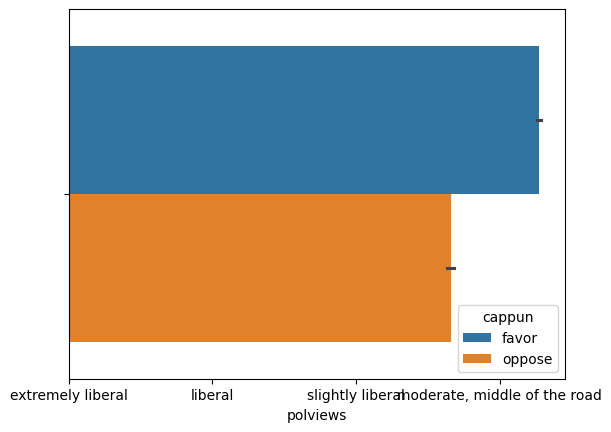

In [15]:
sns.barplot(data=df, x=polviews, hue=cappun)

<Axes: xlabel='cappun'>

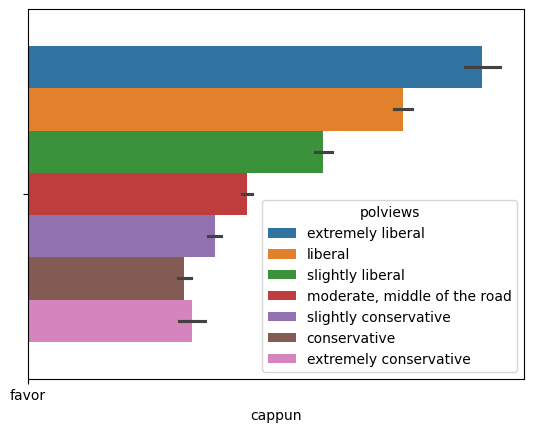

In [17]:
sns.barplot(data=df, x=cappun, hue=polviews)